# Telecom Customer Churn Prediction

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.linear_model import LogisticRegression

In [27]:
df = pd.read_csv("E://DATA SCIENCE//Jupyter_Notebook_Projects//Telecom Churn Prediction//Telecom_Churn_Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing  

In [28]:
df.shape

(7043, 21)

In [29]:
df.drop(columns='customerID', inplace=True)

In [30]:
df.duplicated().sum()

22

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Type casting column Total Charges

In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [34]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
df.dropna(inplace=True)

In [36]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [37]:
cols = df.columns
for i in cols:
    print(i, df[i].unique(), '\n')

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7

Descriptive Statistics

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

### Customer Demographics

Text(0.5, 1.0, 'Dependents')

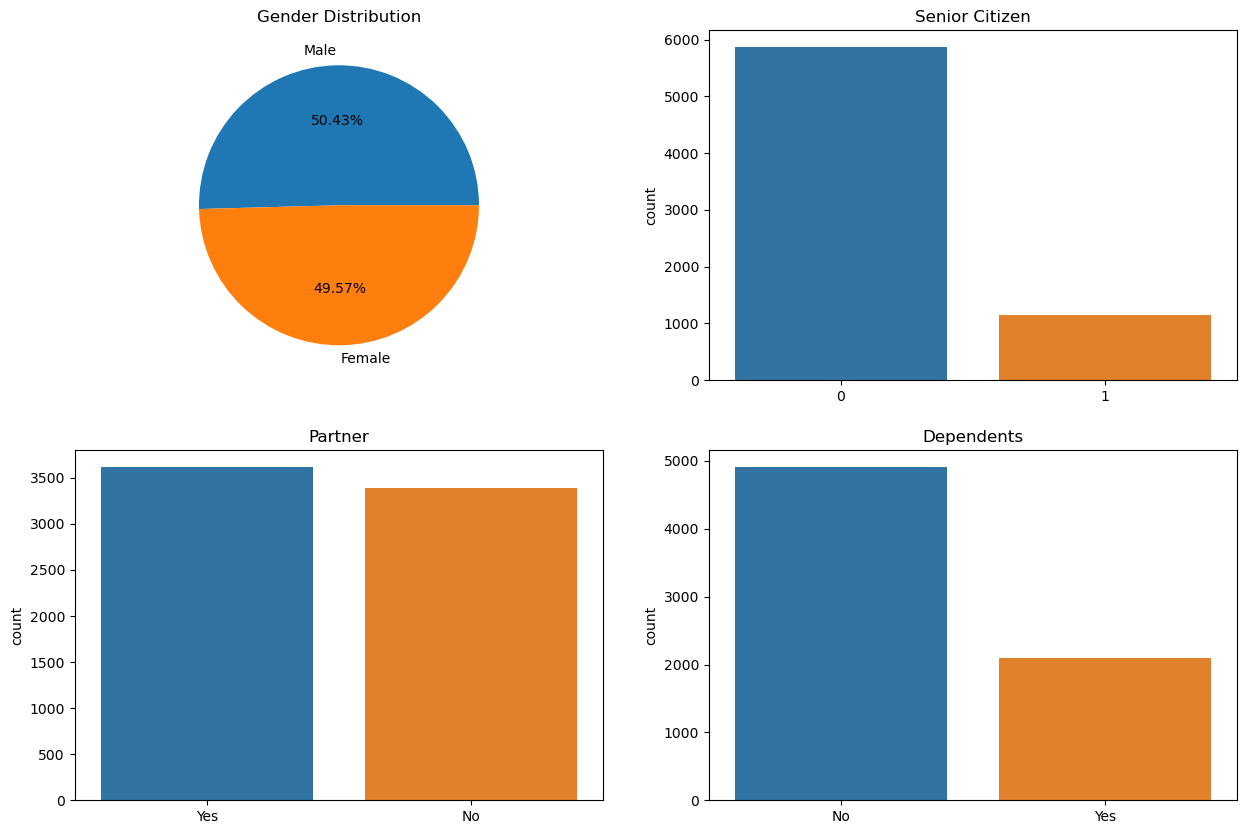

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].pie(df['gender'].value_counts(), labels  = ['Male', 'Female'], autopct = '%1.2f%%')
ax[0,0].set_title('Gender Distribution')

sns.barplot(y = df['SeniorCitizen'].value_counts(), x = df['SeniorCitizen'].unique(), ax=ax[0,1]).set_title('Senior Citizen')

sns.barplot(y = df['Partner'].value_counts(), x = df['Partner'].unique(), ax=ax[1,0]).set_title('Partner')

sns.barplot(y = df['Dependents'].value_counts(), x = df['Dependents'].unique(), ax=ax[1,1]).set_title('Dependents')

### Services

Text(0.5, 1.0, 'Streaming Movies')

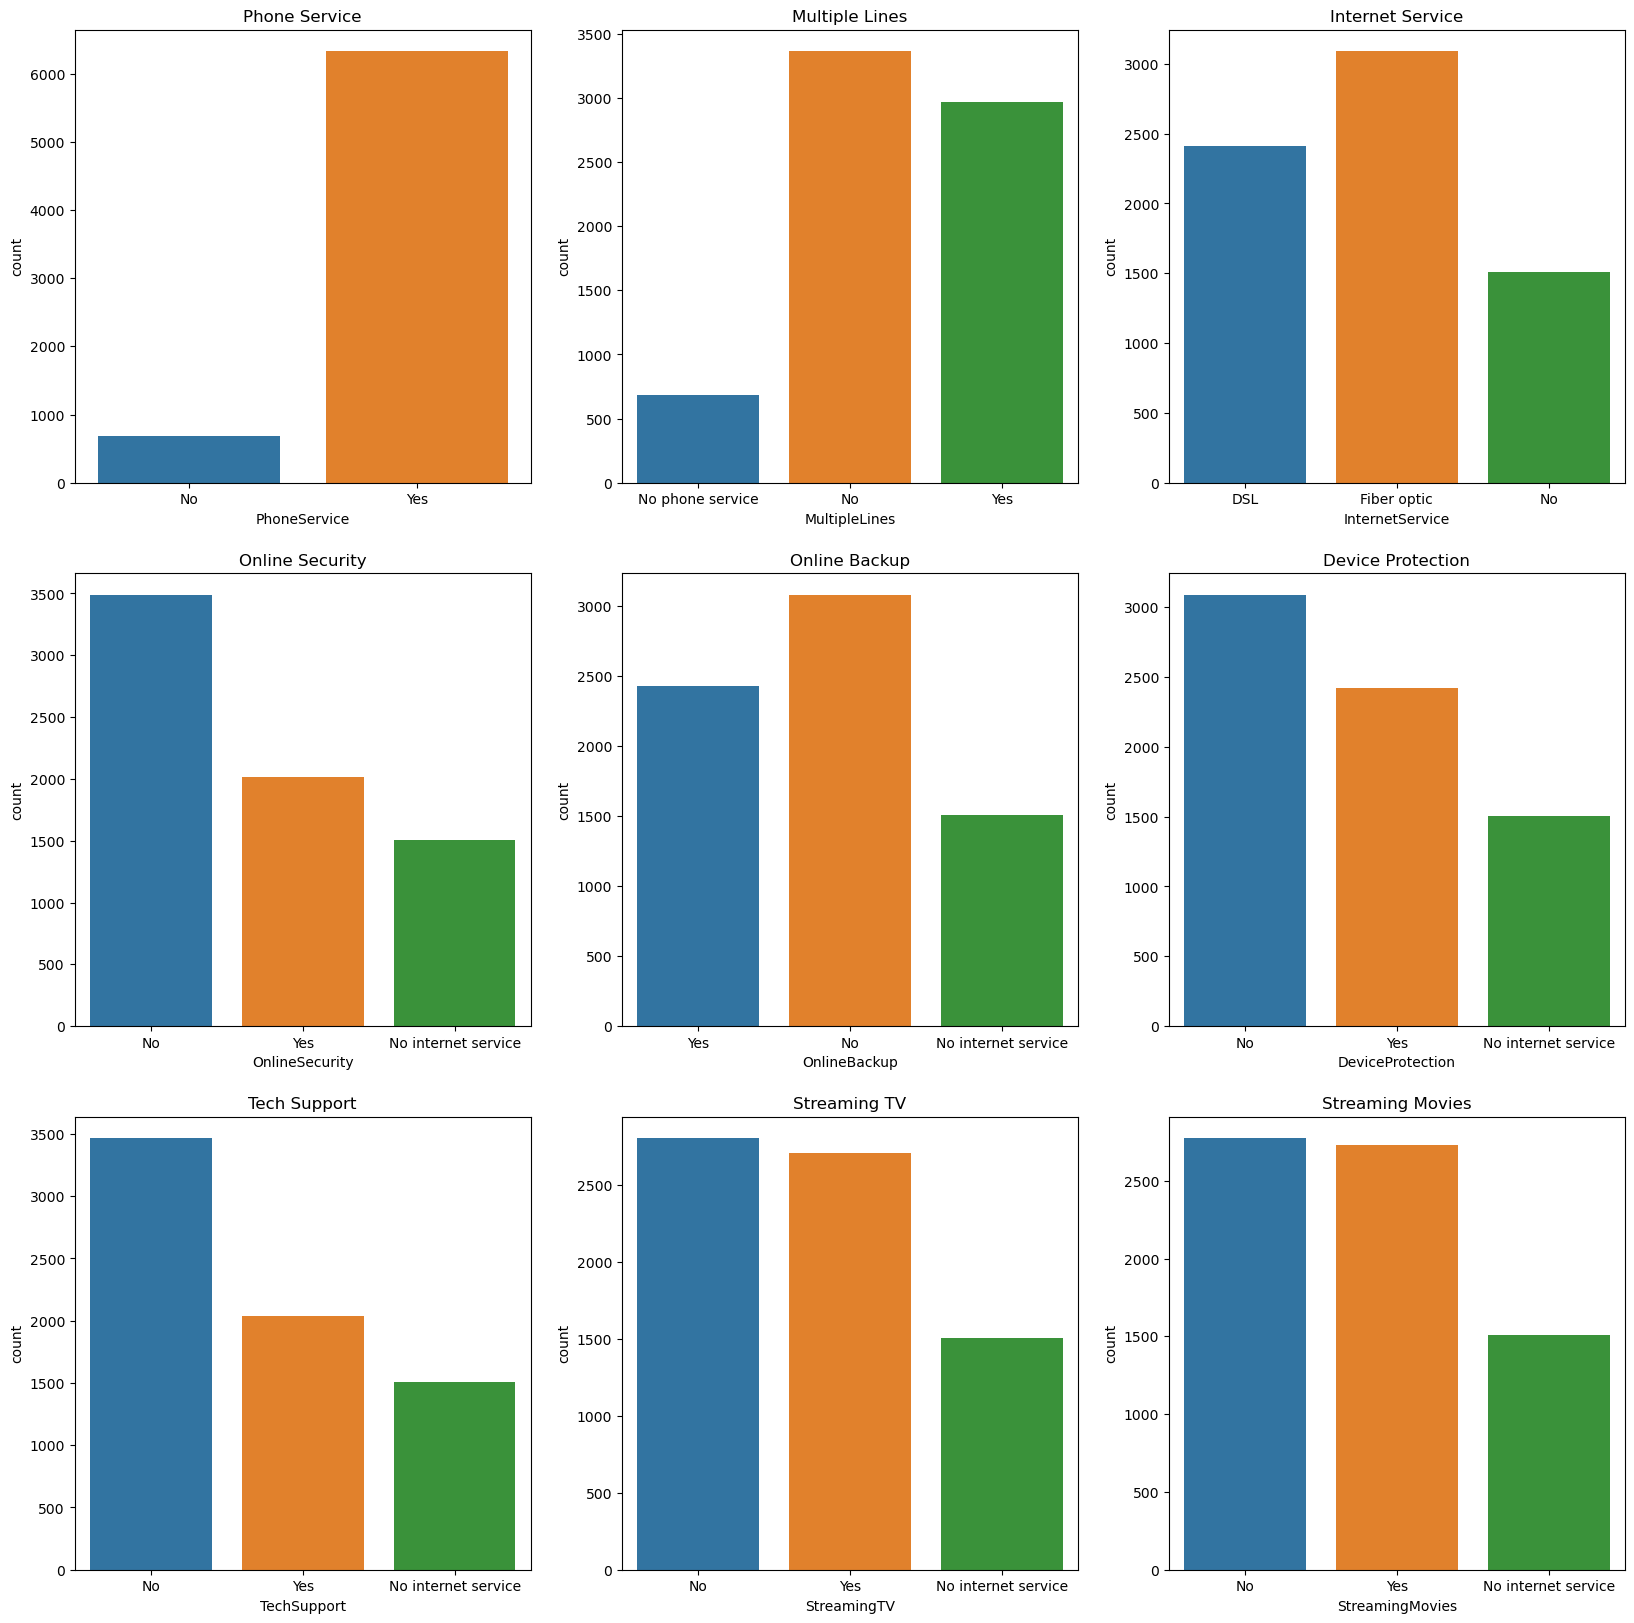

In [41]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
sns.countplot(x = df['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
sns.countplot(x = df['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
sns.countplot(x = df['InternetService'], ax=ax[0,2]).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
ax[1,0].set_title('Online Security')
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
sns.countplot(x = df['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
sns.countplot(x = df['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

### Tenure and Contract

Text(0.5, 1.0, 'Contract Type')

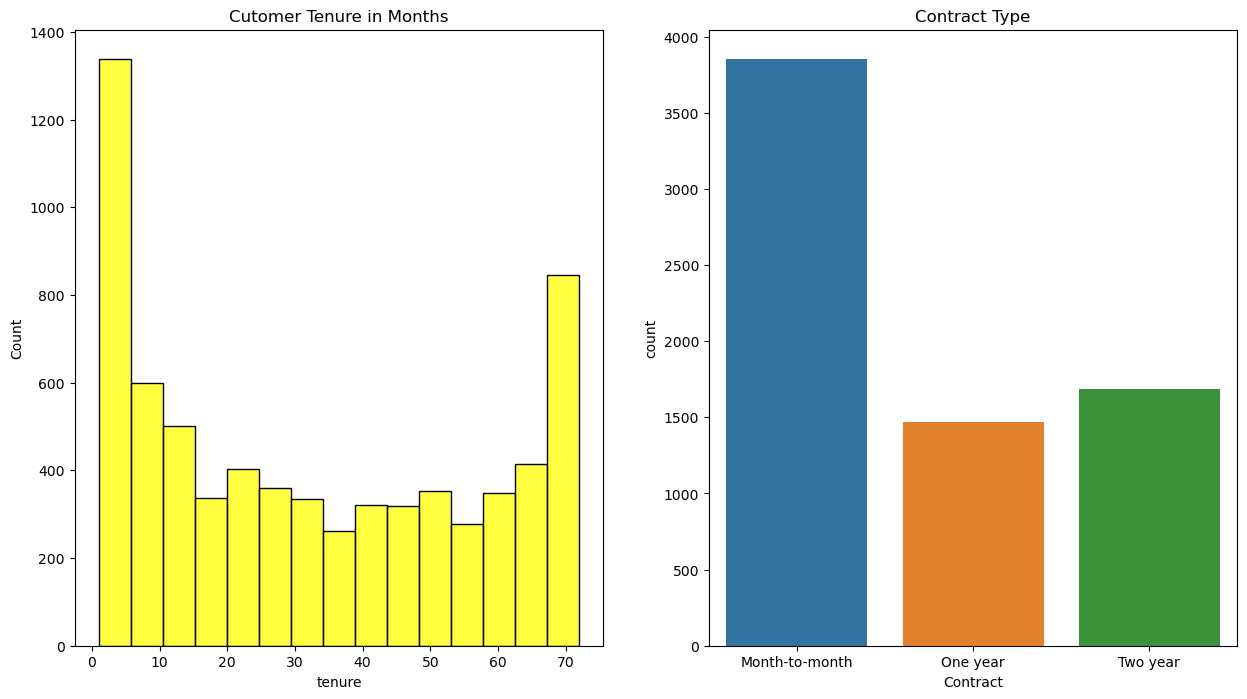

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0], color='yellow').set_title('Cutomer Tenure in Months')
sns.countplot(x = 'Contract', data = df, ax= ax[1]).set_title('Contract Type')

### Billing and Charges

Text(0.5, 1.0, 'Total Charges')

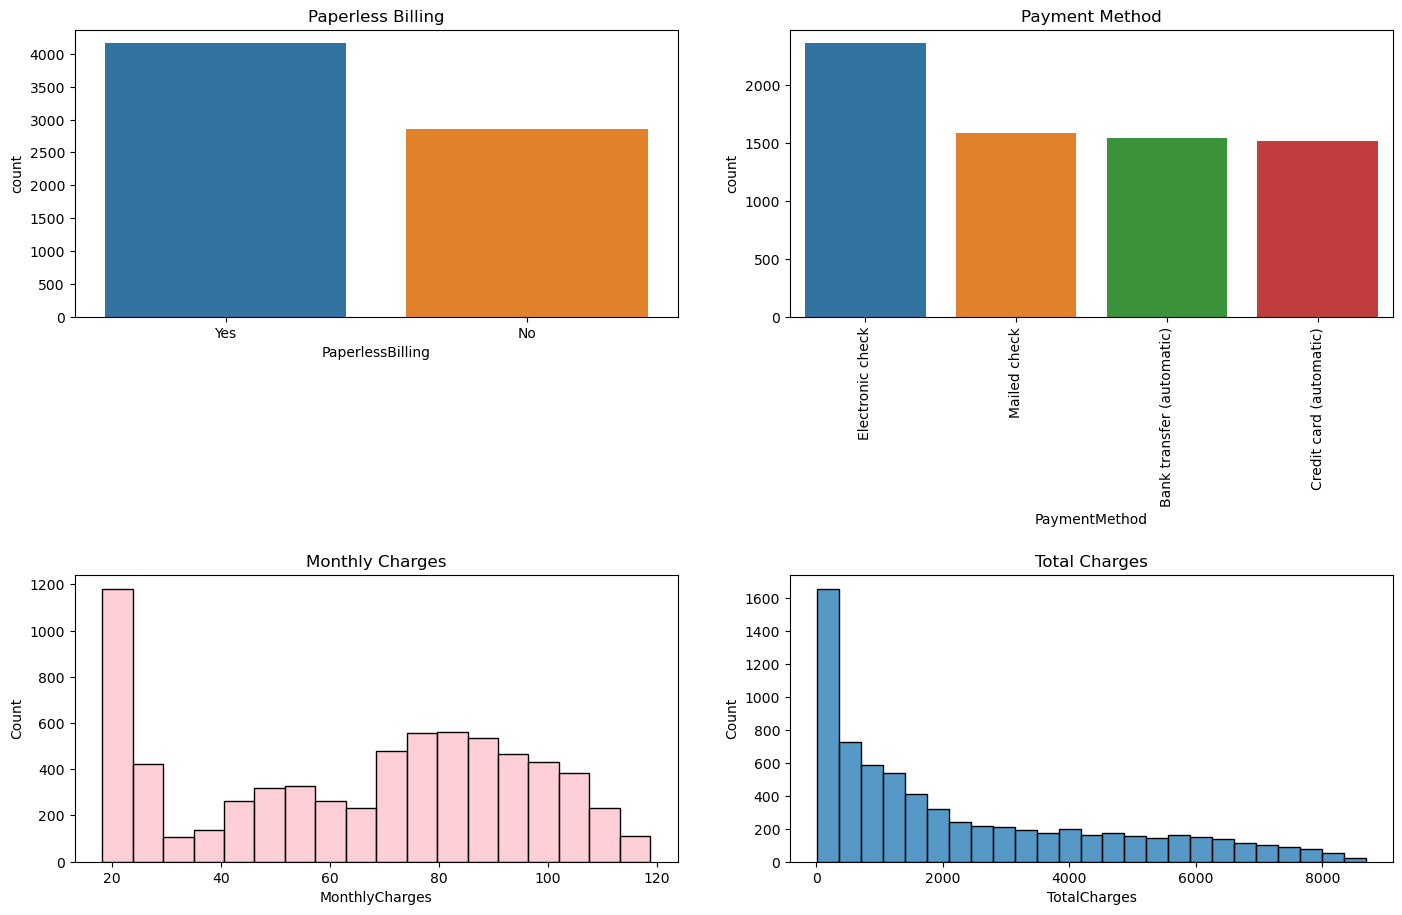

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

fig.subplots_adjust(hspace=0.9)
sns.countplot(x = df['PaperlessBilling'], ax=ax[0,0]).set_title('Paperless Billing')

sns.countplot(x = df['PaymentMethod'], ax=ax[0,1]).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0], color='pink').set_title('Monthly Charges')

sns.histplot(x = 'TotalCharges', data = df, ax = ax[1,1]).set_title('Total Charges')

### Churn Count

Text(0.5, 1.0, 'Churn Count')

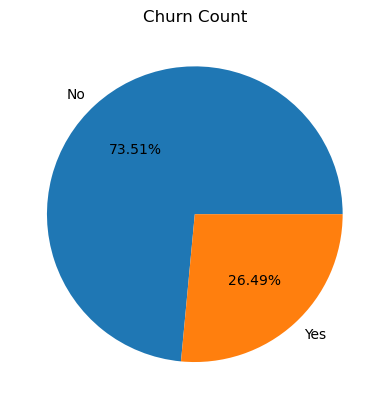

In [44]:
plt.pie(x = df['Churn'].value_counts(), labels = df['Churn'].unique(), autopct = '%1.2f%%')
plt.title('Churn Count')

### Customer Demogrpahics and Churn

Text(0.5, 1.0, 'Dependents and Churn')

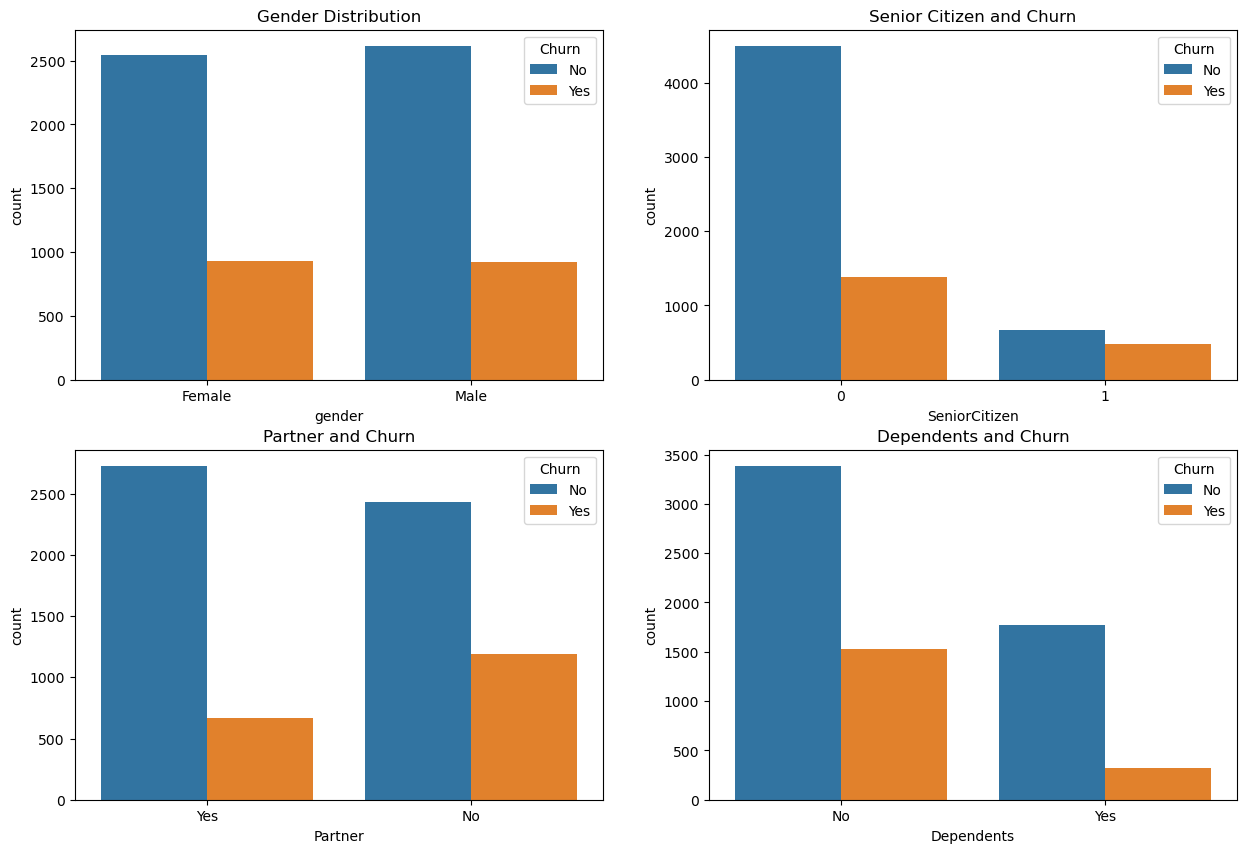

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x = 'gender', data = df, hue = 'Churn', ax=ax[0,0])
ax[0,0].set_title('Gender Distribution')

sns.countplot(x = df['SeniorCitizen'], ax=ax[0,1], hue = df['Churn']).set_title('Senior Citizen and Churn')

sns.countplot( x = df['Partner'], ax=ax[1,0], hue = df['Churn']).set_title('Partner and Churn')

sns.countplot(x = df['Dependents'], ax=ax[1,1], hue = df['Churn']).set_title('Dependents and Churn')

### Services and Churn

Text(0.5, 1.0, 'Streaming Movies')

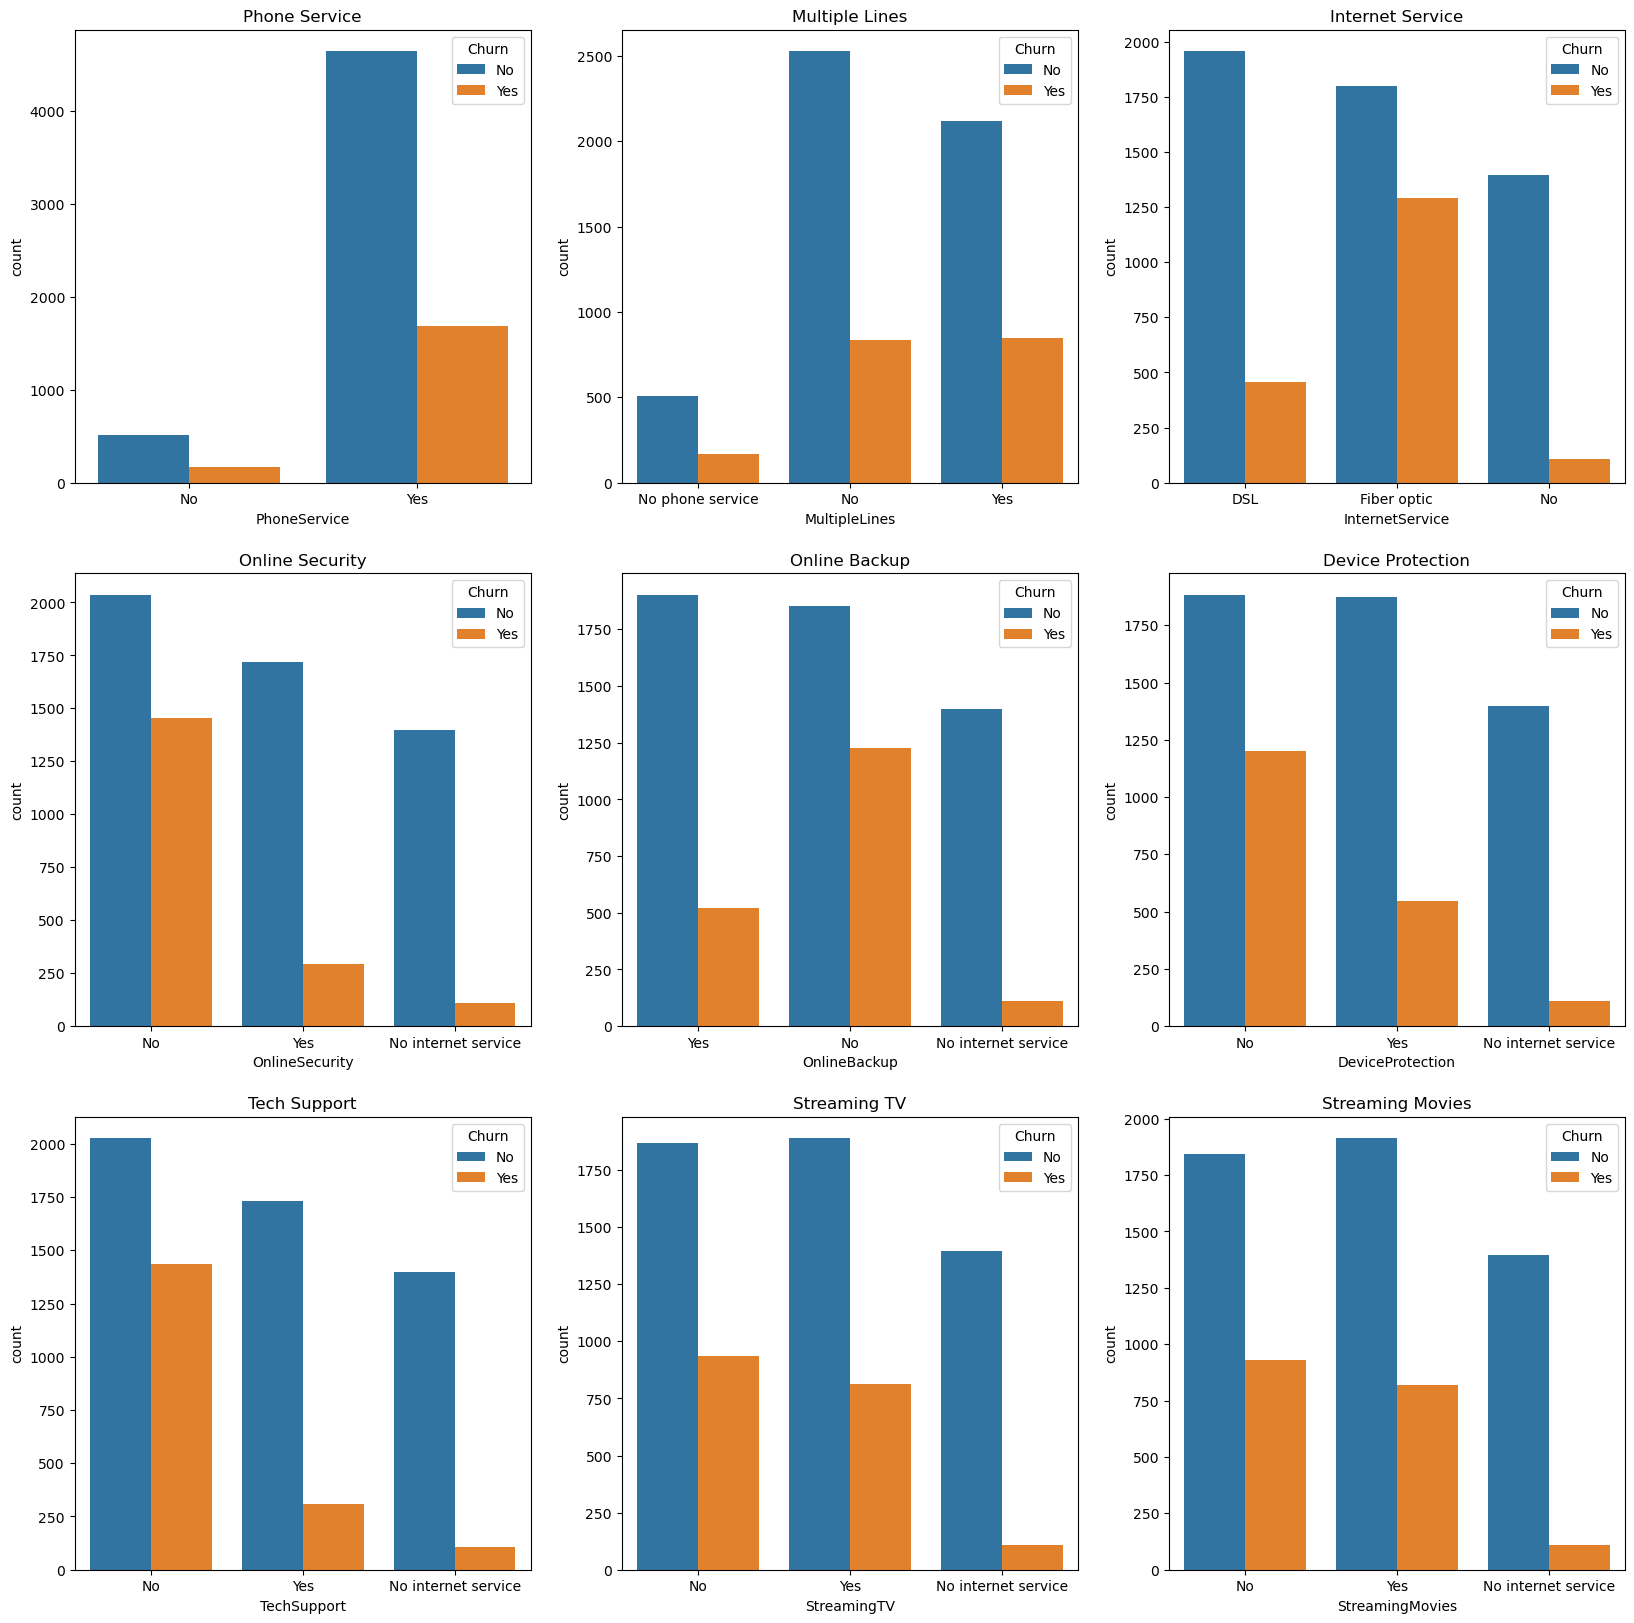

In [46]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
sns.countplot(x = df['PhoneService'], ax=ax[0,0], hue = df['Churn']).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
sns.countplot(x = df['MultipleLines'], ax=ax[0,1], hue = df['Churn']).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
sns.countplot(x = df['InternetService'], ax=ax[0,2], hue = df['Churn']).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0], hue = df['Churn']).set_title('Online Security')
ax[1,0].set_title('Online Security')
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1], hue = df['Churn']).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2], hue = df['Churn']).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
sns.countplot(x = df['TechSupport'], ax=ax[2,0], hue = df['Churn']).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
sns.countplot(x = df['StreamingTV'], ax=ax[2,1], hue = df['Churn']).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2], hue = df['Churn']).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

### Tenure/Contract and Churn

Text(0.5, 1.0, 'Contract Type and Churn')

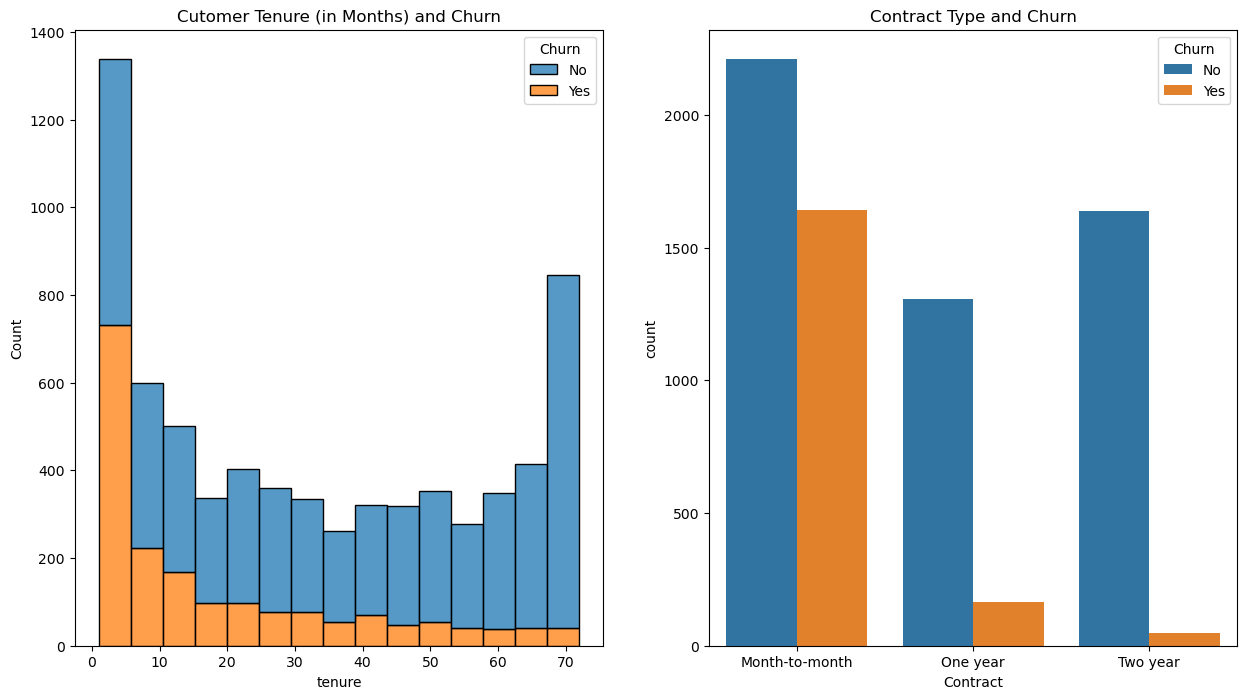

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn')
sns.countplot(x = 'Contract', data = df, ax= ax[1], hue = 'Churn').set_title('Contract Type and Churn')

### Billing/Charges and Churn

Text(0.5, 1.0, 'Total Charges')

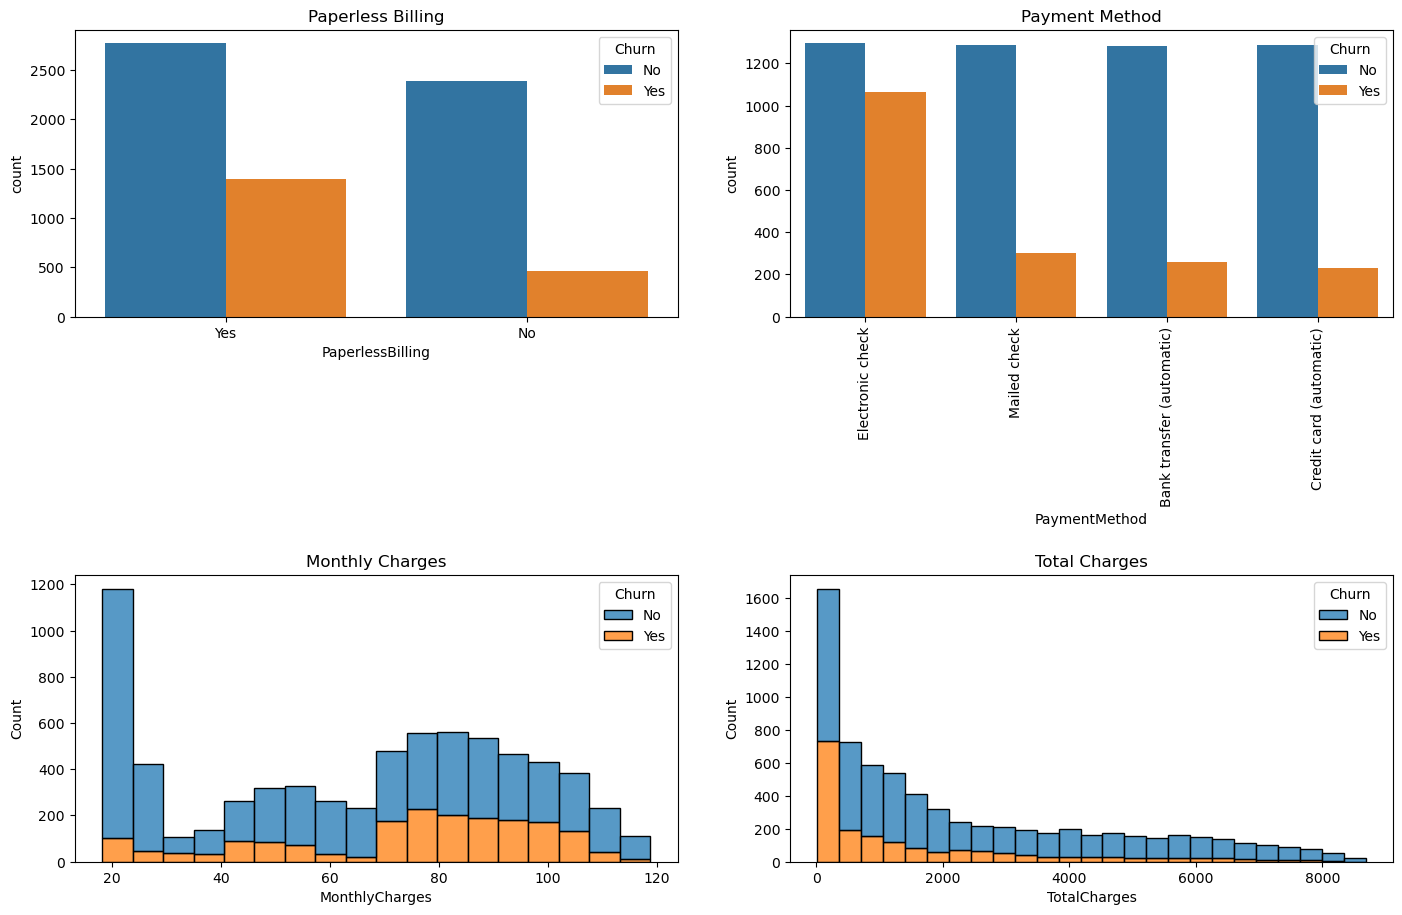

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

fig.subplots_adjust(hspace=0.9)

sns.countplot(x = df['PaperlessBilling'], ax=ax[0,0], hue = df['Churn']).set_title('Paperless Billing')

sns.countplot(x = df['PaymentMethod'], ax=ax[0,1], hue = df['Churn']).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0], hue = 'Churn', multiple= 'stack').set_title('Monthly Charges')

sns.histplot(x = 'TotalCharges', data = df, ax = ax[1,1], hue = 'Churn', multiple= 'stack').set_title('Total Charges')

### Outlier Removal

In [49]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Label Encoding

In [50]:
cols = df.columns[df.dtypes == 'object']

le = LabelEncoder()

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



### Feature Scaling

In [51]:
sc = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

## Correlation Matrix Heatmap

<Axes: >

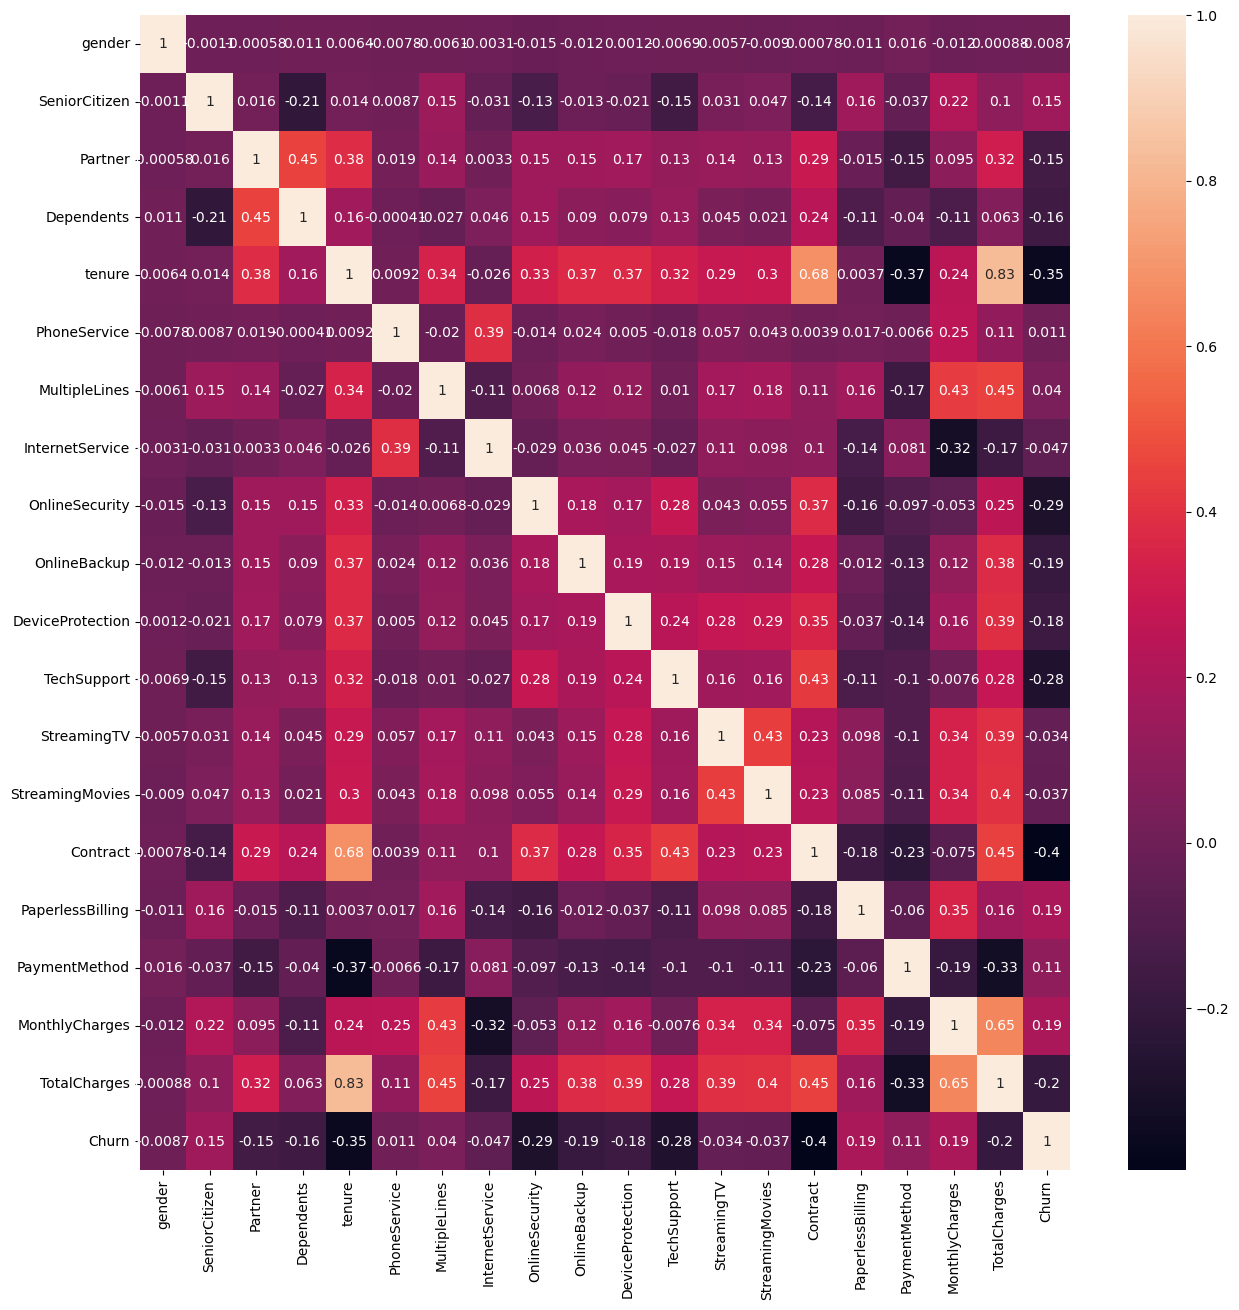

In [52]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

## Train Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Churn'), df['Churn'], test_size=0.2, random_state=42)

## Modeling

### 1> Decision Tree Classifier

In [54]:

dtree  = DecisionTreeClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [55]:
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42}


In [56]:
dtree  = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=10, random_state=42)
dtree.fit(X_train, y_train)
print('Training Accuracy: ', dtree.score(X_train, y_train))
d_pred = dtree.predict(X_test)

Training Accuracy:  0.8072396576319544


### 2> Random Forest Classifier

In [57]:
rfc = RandomForestClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [58]:
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42}


In [59]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=2, random_state=42)
rfc.fit(X_train, y_train)
print('Training Accuracy: ', rfc.score(X_train, y_train))
r_pred = rfc.predict(X_test)

Training Accuracy:  0.8309557774607703


### 3> K Nearest Neighbors Classifier

In [60]:
knn = KNeighborsClassifier()

#### Hyperparameter Tuning using GridSearchCV

In [61]:
param_grid = {
    'n_neighbors': [2,4,6,8,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'}


D:\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.70845086        nan 0.73894244        nan 0.74821504
        nan 0.75178077        nan 0.7544559  0.74375823 0.70845095
 0.75481431 0.73894244 0.76533411 0.74803669 0.76051918 0.75178077
 0.76372792 0.75427755 0.74375823 0.70845095 0.75481431 0.73894244
 0.7649776  0.74803669 0.76051918 0.75195912 0.76390627 0.7544559
        nan 0.70845086        nan 0.73894244        nan 0.74821504
        nan 0.75178077        nan 0.7544559 ]
  warnings.warn(


In [68]:
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='uniform')
knn.fit(X_train, y_train)
print('Training Accuracy: ', knn.score(X_train, y_train))
k_pred = knn.predict(X_test)

Training Accuracy:  0.8215049928673324


### 4> Logistic Regression

In [69]:
logreg = LogisticRegression()

#### Hyperparameter Tuning using GridSearchCV

In [70]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [71]:
logreg = LogisticRegression(C=1,max_iter=200, solver='saga')
logreg.fit(X_train, y_train)
print('Training Accuracy: ', logreg.score(X_train, y_train))
l_pred = logreg.predict(X_test)

Training Accuracy:  0.7970756062767475


## Model Evaluation

### Confusion Matrix Heatmap

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

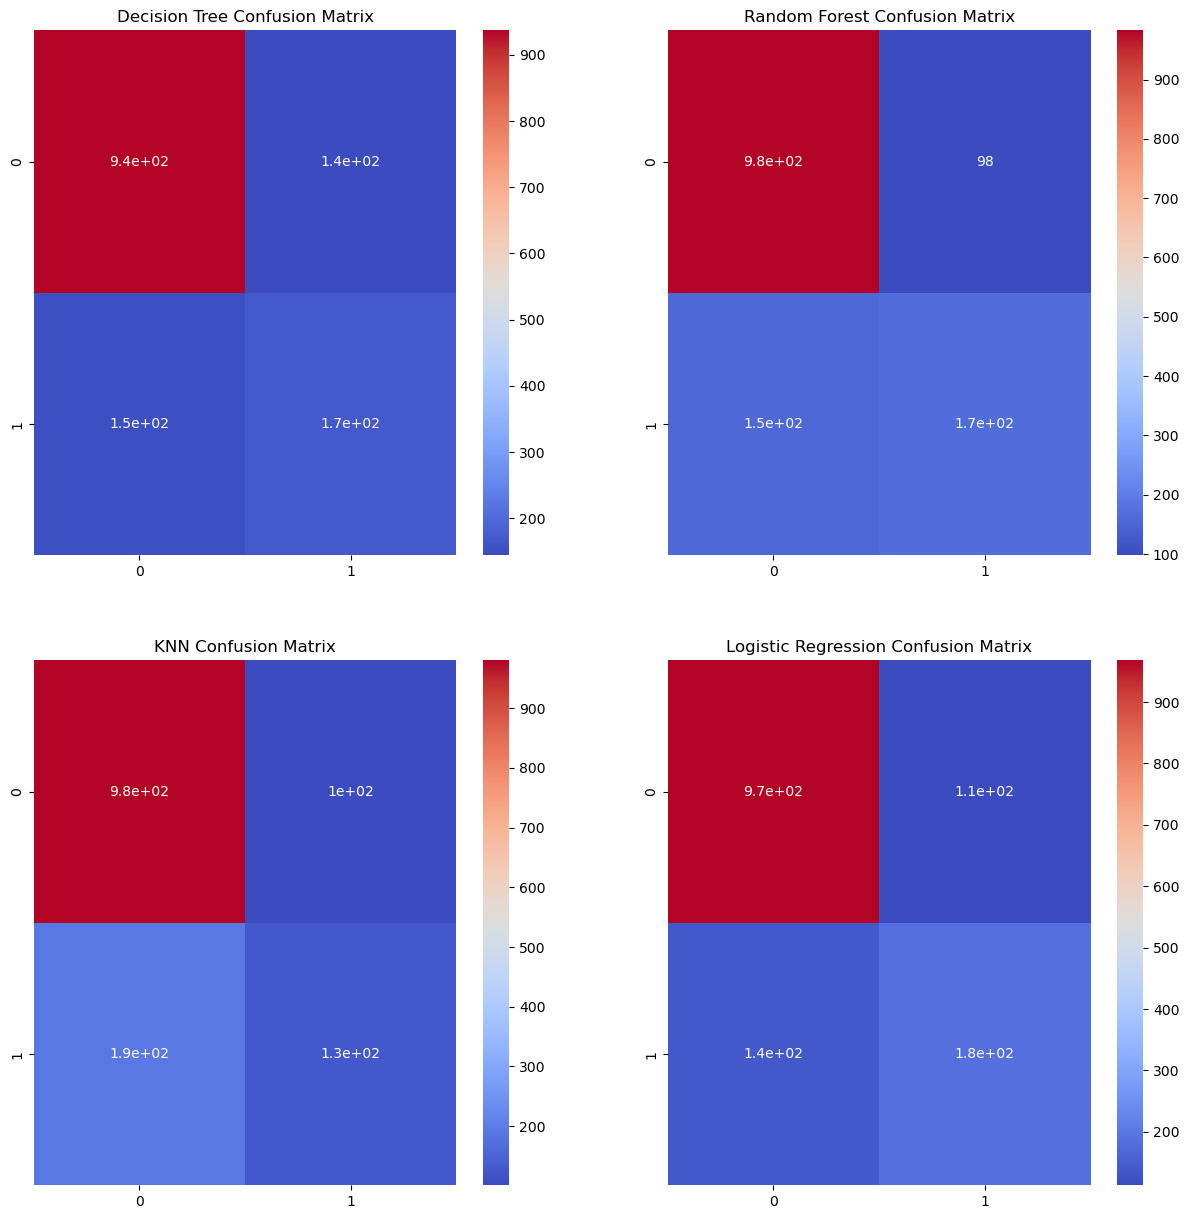

In [83]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[0][0], cmap='coolwarm').set_title('Decision Tree Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, ax=ax[0][1], cmap='coolwarm').set_title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, k_pred), annot=True, ax=ax[1][0], cmap='coolwarm').set_title('KNN Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, ax=ax[1][1], cmap='coolwarm').set_title('Logistic Regression Confusion Matrix')

### Distribution Plot

C:\Users\rahul\AppData\Local\Temp\ipykernel_12848\1683567354.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0][0]).set_title('Decision Tree')
C:\Users\rahul\AppData\Local\Temp\ipykernel_12848\1683567354.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

<Axes: title={'center': 'Logistic Regression'}, xlabel='Churn', ylabel='Density'>

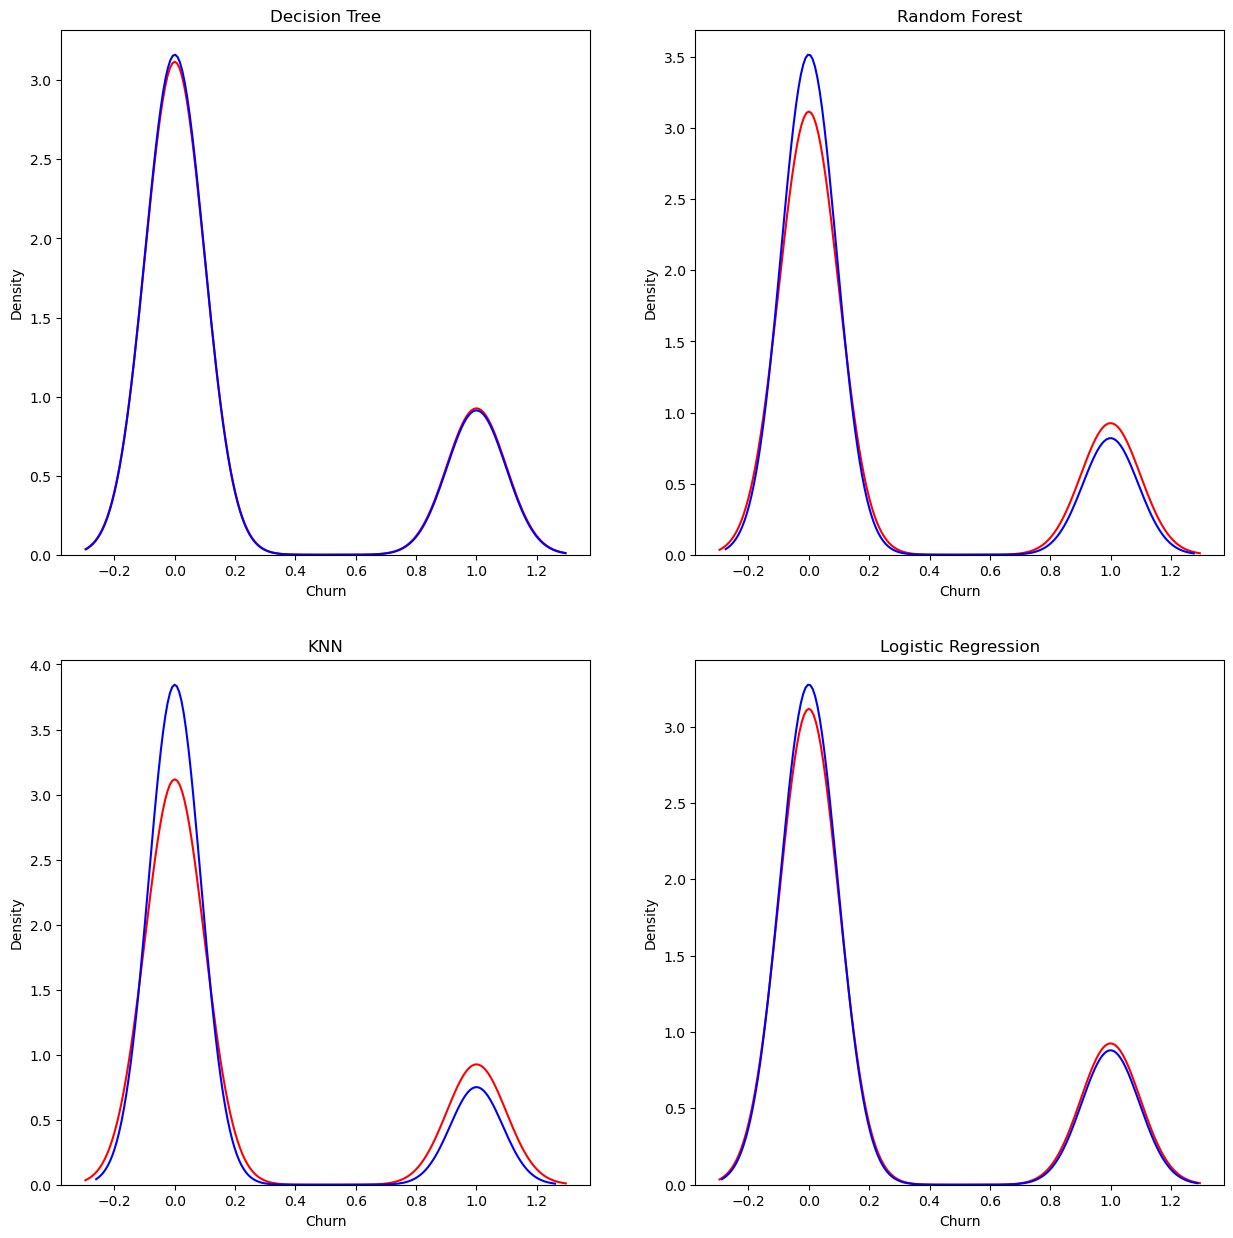

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0][0]).set_title('Decision Tree')
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0][0])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[0][1]).set_title('Random Forest')
sns.distplot(r_pred, hist=False, color="b", label="Fitted Values" , ax=ax[0][1])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1][0]).set_title('KNN')
sns.distplot(k_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1][0])

sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=ax[1][1]).set_title('Logistic Regression')
sns.distplot(l_pred, hist=False, color="b", label="Fitted Values" , ax=ax[1][1])

### Classification Report

In [86]:
print('Decision Tree Classification Report: \n', classification_report(y_test, d_pred))
print('Random Forest Classification Report: \n', classification_report(y_test, r_pred))
print('KNN Classification Report: \n', classification_report(y_test, k_pred))
print('Logistic Regression Report: \n', classification_report(y_test, l_pred))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1081
           1       0.54      0.53      0.54       321

    accuracy                           0.79      1402
   macro avg       0.70      0.70      0.70      1402
weighted avg       0.79      0.79      0.79      1402

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      1081
           1       0.63      0.52      0.57       321

    accuracy                           0.82      1402
   macro avg       0.75      0.71      0.73      1402
weighted avg       0.81      0.82      0.81      1402

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1081
           1       0.56      0.40      0.47       321

    accuracy                           0.79      1402
   macro avg       0.

### Model Metrics

Text(0.5, 1.0, 'F1 Score')

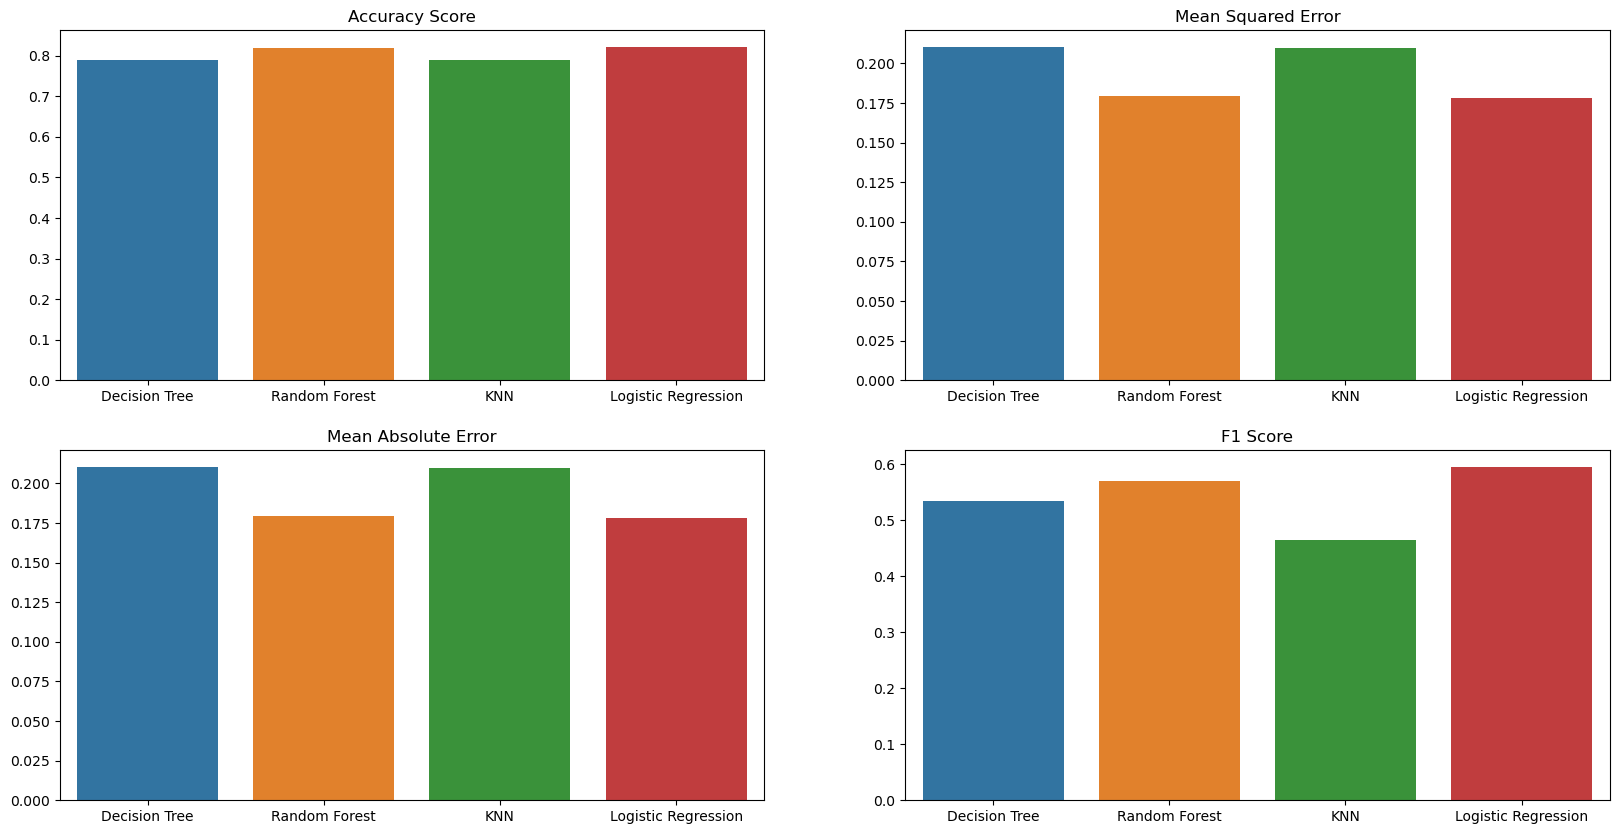

In [88]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

sns.barplot(x = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'], y = [accuracy_score(y_test, d_pred), accuracy_score(y_test, r_pred), accuracy_score(y_test, k_pred), accuracy_score(y_test, l_pred)], ax=ax[0,0]).set_title('Accuracy Score')
sns.barplot(x = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'], y = [mean_squared_error(y_test, d_pred), mean_squared_error(y_test, r_pred), mean_squared_error(y_test, k_pred), mean_squared_error(y_test, l_pred)], ax=ax[0,1]).set_title('Mean Squared Error')
sns.barplot(x = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'], y = [mean_absolute_error(y_test, d_pred), mean_absolute_error(y_test, r_pred), mean_absolute_error(y_test, k_pred), mean_absolute_error(y_test, l_pred)], ax=ax[1,0]).set_title('Mean Absolute Error')
sns.barplot(x = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'], y = [f1_score(y_test, d_pred), f1_score(y_test, r_pred), f1_score(y_test, k_pred), f1_score(y_test, l_pred)], ax=ax[1,1]).set_title('F1 Score')

## Feature Importance

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

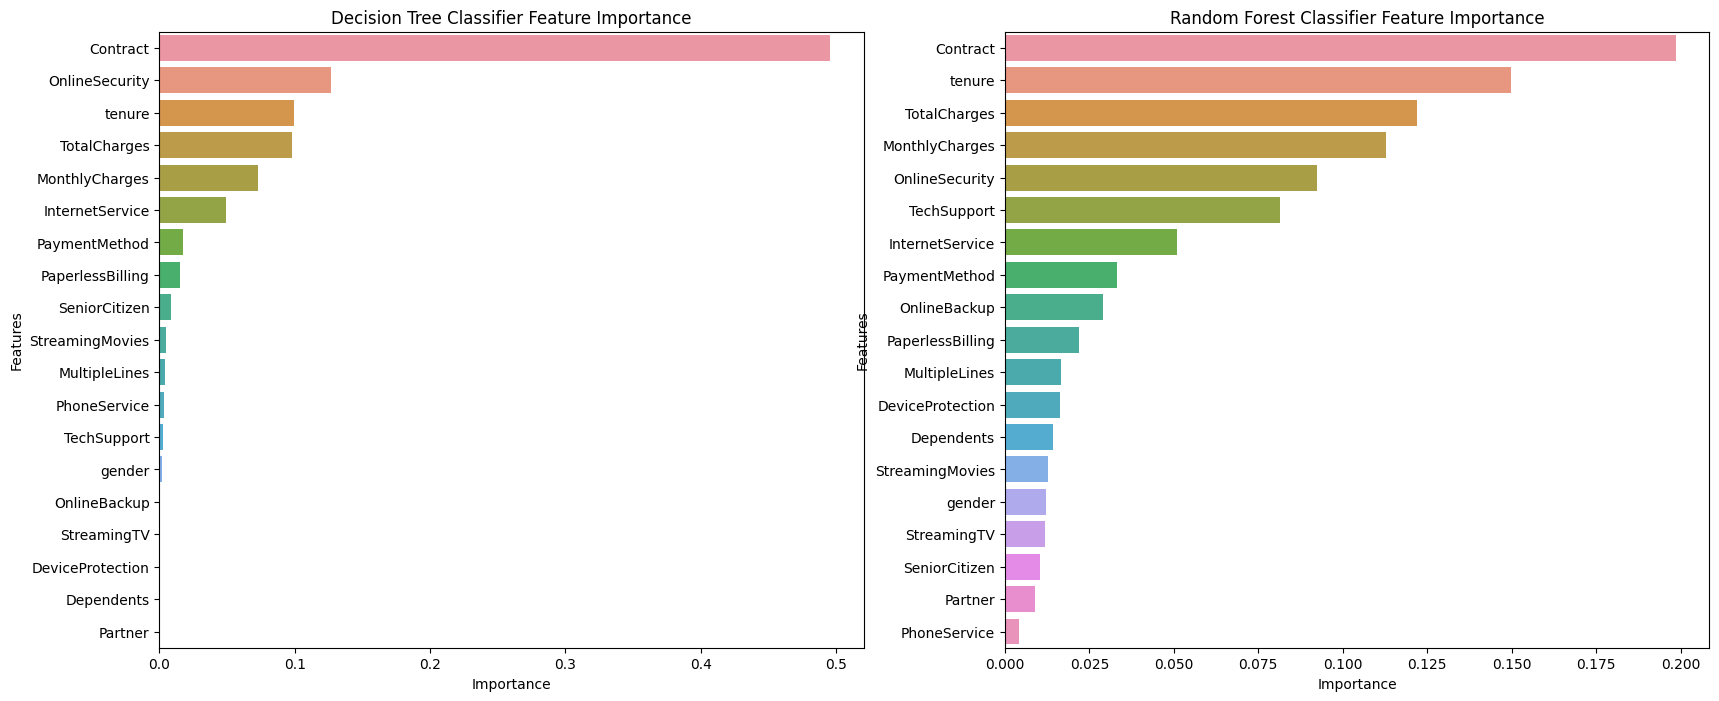

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[0]).set_title('Decision Tree Classifier Feature Importance')

feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[1]).set_title('Random Forest Classifier Feature Importance')

## Conclusion

From the exploratory data analysis, I came to know that, the senior citizens have lower churn count whereas the customers who are single or don't have dependents ahve higher churn count. In addition to that, customers are more satified with the streaming services than other services such as Online backup and Device protection, which has resulted in lower churn count in customer with streaing services than the other services.

The tenure have an inverse relation with churn count, where customer with tenure shorter than 5 months have higher churn count. Moreover, the customers with month-to-month contract have higher churn count as compared to those with one or two year contract which also proves that customer who have longer contract with the company have lower churn count.

It has been observed that the customers with higher monthly charges and lower total charges have higher churn count. Therefore, the company should focus on lowering the monthly charges for the customers in order to reduce the churn count. From the feature importance, it is clear that the tenure, contract, monthly charges, and total charges are the most important features for predicting the customer churn. Therefore, the company should focus on these features to reduce the customer churn.

Coming to the machine learning models, I have used three models - Decision Tree Classifier, Random Forest Classifier, and K Nearest Neighbors Classifier. The Random Forest Classifier has the highest accuracy i.e. 82% and F1 Score, and lowest mean squared error, mean absolute error. Therefore, the Random Forest Classifier is a good fit for predicting the customer churn.